In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Neodymium Quant - Mohit

In [2]:
brent_oil=pd.read_csv('/kaggle/input/lng-price/Brent Oil Futures Historical Data.csv')
ttf_price=pd.read_csv('/kaggle/input/lng-price/Dutch TTF Natural Gas Futures Historical Data.csv')
europe_gas_imports_mmcm=pd.read_csv('/kaggle/input/lng-price/Europe Natural Gas Imports MMcm.csv', encoding='cp1252')
monthly_weather_data = pd.read_csv('/kaggle/input/weather-data/monthly_avg_temperatures_2020_2024.csv')
henry_hub_price=pd.read_csv('/kaggle/input/lng-price/Henry_Hub_Natural_Gas_Spot_Price.csv')
us_lng_exports_mmcf=pd.read_csv('/kaggle/input/lng-price/Liquefied_U.S._Natural_Gas_Exports.csv')
jkm_price=pd.read_csv('/kaggle/input/lng-price/LNG Japan_Korea Marker PLATTS Future Historical Data.csv')

In [3]:
europe_gas_imports_mmcm.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,ï»¿Month,2008-01,Unnamed: 2,2008-02,Unnamed: 4,2008-03,Unnamed: 6,2008-04,Unnamed: 8,2008-05,...,2024-11,Unnamed: 406,2024-12,Unnamed: 408,2025-01,Unnamed: 410,2025-02,Unnamed: 412,2025-03,Unnamed: 414
0,European Union - 27 countries (from 2020),:,NaN,:,NaN,:,NaN,:,NaN,:,...,"36,254.39",NaN,"37,795.46",NaN,"36,782.47",NaN,"35,056.35",NaN,:,NaN
1,Belgium,:,NaN,:,NaN,:,NaN,:,NaN,:,...,"2,789.50",NaN,"2,965.10",NaN,"3,103.40",NaN,"3,709.30",NaN,"3,578.80",NaN
2,Bulgaria,:,NaN,:,NaN,:,NaN,:,NaN,:,...,"1,720.28",NaN,"1,733.98",NaN,"1,758.86",NaN,"1,742.66",NaN,"1,612.21",p
3,Czechia,:,NaN,:,NaN,:,NaN,:,NaN,:,...,423.153,NaN,408.034,NaN,473.41,NaN,461.509,NaN,552.479,p
4,Denmark,:,NaN,:,NaN,:,NaN,:,NaN,:,...,765.392,NaN,838.375,NaN,695.946,NaN,696.692,NaN,676.609,NaN


In [4]:
eu_gas_imports_cleaned = europe_gas_imports_mmcm.loc[:, ~europe_gas_imports_mmcm.columns.str.contains(r'Unnamed: \d{1,3}', regex=True)]

In [5]:
eu_gas_imports_cleaned_transposed = eu_gas_imports_cleaned.T

In [6]:
eu_gas_imports_cleaned_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
ï»¿Month,European Union - 27 countries (from 2020),Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,United Kingdom,Montenegro,Moldova,North Macedonia,Georgia,Albania,Serbia,TÃ¼rkiye,Ukraine,Kosovo*
2008-01,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
2008-02,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
2008-03,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
2008-04,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:


In [7]:
# Rename the specific column(s)
eu_gas_imports_cleaned_transposed.rename(columns={'ï»¿Month': 'Month'}, inplace=True)

# Verify the column names
print(eu_gas_imports_cleaned_transposed.columns)

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39],
      dtype='int64')


In [8]:
eu_gas_imports_cleaned_transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
ï»¿Month,European Union - 27 countries (from 2020),Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,...,United Kingdom,Montenegro,Moldova,North Macedonia,Georgia,Albania,Serbia,TÃ¼rkiye,Ukraine,Kosovo*
2008-01,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
2008-02,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
2008-03,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
2008-04,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:


In [9]:
print(len(eu_gas_imports_cleaned_transposed))

208


In [10]:
eu_gas_imports_cleaned_transposed = eu_gas_imports_cleaned_transposed.iloc[:207]


In [11]:
print(len(eu_gas_imports_cleaned_transposed))

207


In [12]:
# Make an explicit copy to avoid SettingWithCopyWarning
eu_gas_imports_cleaned_transposed = eu_gas_imports_cleaned_transposed.iloc[:, 1:].copy()

# Now add the Month column
eu_gas_imports_cleaned_transposed['Month'] = pd.date_range(start='2008-01-01', end='2025-03-01', freq='MS')

# Set as index
eu_gas_imports_cleaned_transposed.set_index('Month', inplace=True)

In [13]:
# Step 1: Move the index back to a column temporarily
df = eu_gas_imports_cleaned_transposed.reset_index()

# Step 2: Set the first row (which contains country names) as the new header
df.columns = df.iloc[0]  # First row becomes header
df = df[1:]              # Remove the row now used as header

# Step 3: Rename the first column to 'Month'
df.rename(columns={df.columns[0]: 'Month'}, inplace=True)

# Step 4: Convert 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'], errors='coerce')

# Step 5: Reset index if needed
df.reset_index(drop=True, inplace=True)

# Step 6: Optional — clean weird encodings in country names (like Türkiye or Kosovo*)
df.columns = df.columns.str.encode('utf-8').str.decode('utf-8', errors='replace')

In [14]:
# Set 'Month' as the index again
df.set_index('Month', inplace=True)

In [15]:
df.head()

,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,United Kingdom,Montenegro,Moldova,North Macedonia,Georgia,Albania,Serbia,TÃ¼rkiye,Ukraine,Kosovo*
Month,,,,,,,,,,,,,,,,,,,,,
2008-02-01,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
2008-03-01,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
2008-04-01,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
2008-05-01,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:
2008-06-01,:,:,:,:,:,:,:,:,:,:,...,:,:,:,:,:,:,:,:,:,:


In [16]:
df_eu_imports_filtered = df.loc['2020-01' : '2024-12']

In [17]:
# Step 1: Clean up string formatting
df_eu_imports_filtered = df_eu_imports_filtered.apply(
    lambda col: col.astype(str).str.replace(',', '').str.strip()
)

# Step 2: Convert to numeric, coercing invalid entries to NaN
df_eu_imports_filtered = df_eu_imports_filtered.apply(pd.to_numeric, errors='coerce')

# ✅ Step 3: Replace NaN with 0
df_eu_imports_filtered.fillna(0, inplace=True)

# ✅ Step 4: Convert all columns to regular integer type
df_eu_imports_filtered = df_eu_imports_filtered.astype(int)

In [18]:
# Rename the problematic column
df_eu_imports_filtered.rename(columns={'TÃ¼rkiye': 'Turkey'}, inplace=True)

In [19]:
df_eu_imports_filtered.head()

,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,United Kingdom,Montenegro,Moldova,North Macedonia,Georgia,Albania,Serbia,Turkey,Ukraine,Kosovo*
Month,,,,,,,,,,,,,,,,,,,,,
2020-01-01,4258,863,2938,309,14955,65,273,393,3209,4939,...,5850,0,0,0,367,0,294,5417,0,0
2020-02-01,3646,616,3953,176,15329,53,302,605,2878,3399,...,4003,0,175,40,419,0,278,5988,380,0
2020-03-01,4222,455,3589,192,13971,49,282,533,2610,3713,...,4252,0,145,25,350,0,252,5261,877,0
2020-04-01,4832,507,3721,233,14008,50,297,401,2793,4339,...,5267,0,110,15,224,0,226,3941,1126,0
2020-05-01,3914,421,3422,212,13002,36,247,374,2069,5353,...,3530,0,63,12,186,0,57,2501,472,0


In [20]:
monthly_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            60 non-null     object 
 1   France          59 non-null     float64
 2   Netherlands     55 non-null     float64
 3   Spain           59 non-null     float64
 4   Italy           59 non-null     float64
 5   Turkey          60 non-null     float64
 6   United Kingdom  59 non-null     float64
 7   Belgium         58 non-null     float64
 8   Germany         60 non-null     float64
 9   Poland          59 non-null     float64
dtypes: float64(9), object(1)
memory usage: 4.8+ KB


In [21]:
for column in monthly_weather_data.columns[1:]:  # Skip 'Date' column
    mean_value = monthly_weather_data[column].mean()
    monthly_weather_data[column].fillna(mean_value, inplace=True)

/tmp/ipykernel_35/3638224770.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  monthly_weather_data[column].fillna(mean_value, inplace=True)


In [22]:
monthly_weather_data.head()

,Date,France,Netherlands,Spain,Italy,Turkey,United Kingdom,Belgium,Germany,Poland
0,2020-01-01,7.1,6.500000,6.9,8.6,6.8,6.3,6.4,4.6,2.5
1,2020-02-01,9.1,7.200000,10.8,11.3,8.2,6.7,7.5,6.3,4.0
2,2020-03-01,9.3,11.998182,11.3,12.2,10.1,8.1,7.6,6.0,5.0
3,2020-04-01,15.4,11.000000,13.7,15.3,11.7,10.8,13.1,10.7,9.5
4,2020-05-01,16.9,13.200000,19.6,20.9,17.4,13.2,14.7,12.3,12.0


In [23]:
brent_oil['Date'] = pd.to_datetime(brent_oil['Date'], dayfirst=True, errors='coerce')

brent_oil = brent_oil.drop(columns=['Vol.', 'Change %'], errors='ignore')

brent_oil = brent_oil.sort_values('Date').reset_index(drop=True)
brent_oil.head()

,Date,Price,Open,High,Low
0,2020-01-02,66.25,66.41,66.58,65.72
1,2020-01-03,68.60,66.28,69.50,66.22
2,2020-01-06,68.91,69.35,70.74,68.21
3,2020-01-07,68.27,68.63,68.75,67.65
4,2020-01-08,65.44,71.22,71.75,64.94


In [24]:
ttf_price['Date'] = pd.to_datetime(ttf_price['Date'], dayfirst=True, errors='coerce')

ttf_price = ttf_price.drop(columns=['Vol.', 'Change %'], errors='ignore')

ttf_price = ttf_price.sort_values('Date').reset_index(drop=True)

ttf_price.head()


,Date,Price,Open,High,Low
0,2020-01-02,12.075,12.435,12.46,12.135
1,2020-01-03,12.985,12.405,12.75,12.405
2,2020-01-06,12.280,12.695,12.70,12.695
3,2020-01-07,11.930,11.950,12.15,11.865
4,2020-01-08,11.965,11.835,12.05,11.825


In [25]:
monthly_avg = henry_hub_price.groupby(pd.to_datetime(henry_hub_price['Week of']).dt.to_period('M'))['Henry Hub Natural Gas Spot Price Dollars per Million Btu'].mean().reset_index().rename(columns={'Week of': 'Month', 'Henry Hub Natural Gas Spot Price Dollars per Million Btu': 'Avg Henry Hub Price'})
monthly_avg['Month'] = monthly_avg['Month'].dt.to_timestamp()

In [26]:
monthly_avg = monthly_avg[(monthly_avg['Month'] >= '2020-01-01') & (monthly_avg['Month'] <= '2024-12-31')]

In [27]:
monthly_avg.head()

,Month,Avg Henry Hub Price
276,2020-01-01,2.0160
277,2020-02-01,1.9175
278,2020-03-01,1.7975
279,2020-04-01,1.7400
280,2020-05-01,1.7440


In [28]:
us_lng_exports_mmcf['Month'] = pd.to_datetime(us_lng_exports_mmcf['Month'], format='%b-%y')

# Filter dates between 2020-01-01 and 2024-12-31
us_lng_exports_mmcf = us_lng_exports_mmcf[
    (us_lng_exports_mmcf['Month'] >= '2020-01-01') & 
    (us_lng_exports_mmcf['Month'] <= '2024-12-31')
]

# Sort ascending by date (oldest first)
us_lng_exports_mmcf = us_lng_exports_mmcf.sort_values('Month').reset_index(drop=True)
us_lng_exports_mmcf.head()


,Month,Liquefied U.S. Natural Gas Exports Million Cubic Feet
0,2020-01-01,250305
1,2020-02-01,225786
2,2020-03-01,244269
3,2020-04-01,210466
4,2020-05-01,182438


In [29]:
jkm_price['Date'] = pd.to_datetime(jkm_price['Date'], dayfirst=True)

jkm_price = jkm_price.drop(columns=['Vol.', 'Change %'], errors='ignore')

jkm_price['Month'] = jkm_price['Date'].dt.to_period('M')

monthly_avg_jkm = (
    jkm_price
    .groupby('Month')
    .mean(numeric_only=True)
    .reset_index()
)

monthly_avg_jkm['Month'] = monthly_avg_jkm['Month'].dt.to_timestamp()

monthly_avg_jkm.rename(columns={'Month': 'Date'}, inplace=True)

monthly_avg_jkm = monthly_avg_jkm.sort_values('Date').reset_index(drop=True)

In [30]:
monthly_avg_jkm.head()

,Date,Price,Open,High,Low
0,2020-01-01,4.36250,4.36250,4.36250,4.36250
1,2020-02-01,3.26125,3.26125,3.26125,3.26125
2,2020-03-01,3.10100,3.10100,3.10100,3.10100
3,2020-04-01,2.29375,2.29375,2.29375,2.29375
4,2020-05-01,2.05500,2.05500,2.05500,2.05500


In [31]:
us_lng_exports_mmcf.head()

,Month,Liquefied U.S. Natural Gas Exports Million Cubic Feet
0,2020-01-01,250305
1,2020-02-01,225786
2,2020-03-01,244269
3,2020-04-01,210466
4,2020-05-01,182438


In [32]:
# Step 1: Keep only 'Date' and 'Price' in price datasets
ttf_price = ttf_price[['Date', 'Price']].copy()
monthly_avg_jkm = monthly_avg_jkm[['Date', 'Price']].copy()
brent_oil = brent_oil[['Date', 'Price']].copy()

# Step 2: Reset index and rename first column to 'Date' for df_eu_imports_filtered
df_eu_imports_filtered = df_eu_imports_filtered.reset_index()
df_eu_imports_filtered.rename(columns={df_eu_imports_filtered.columns[0]: 'Date'}, inplace=True)

# Step 3: Remove all columns that are NOT exactly 'Date' but contain 'Date' (e.g. 'Date.1', 'Date_x', etc.)
def clean_date_duplicates(df):
    date_like_cols = [col for col in df.columns if 'Date' in col and col != 'Date']
    return df.drop(columns=date_like_cols, errors='ignore')

# Apply cleanup
datasets = [df_eu_imports_filtered, monthly_weather_data, brent_oil, ttf_price, monthly_avg, monthly_avg_jkm, us_lng_exports_mmcf]
datasets = [clean_date_duplicates(df) for df in datasets]

# Step 4: Convert 'Date' to datetime
for df in datasets:
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 5: Unpack cleaned DataFrames
(
    df_eu_imports_filtered, monthly_weather_data, brent_oil,
    ttf_price, monthly_avg, monthly_avg_jkm, us_lng_exports_mmcf
) = datasets


In [33]:
# Rename 'Month' to 'Date' where needed
for df in [df_eu_imports_filtered, monthly_avg, us_lng_exports_mmcf]:
    if 'Month' in df.columns:
        df.rename(columns={'Month': 'Date'}, inplace=True)


In [34]:
merged_df = df_eu_imports_filtered \
    .merge(monthly_weather_data, on='Date', how='inner') \
    .merge(brent_oil, on='Date', how='inner', suffixes=('', '_brent')) \
    .merge(ttf_price, on='Date', how='inner', suffixes=('', '_ttf')) \
    .merge(monthly_avg, on='Date', how='inner') \
    .merge(monthly_avg_jkm, on='Date', how='inner', suffixes=('', '_jkm')) \
    .merge(us_lng_exports_mmcf, on='Date', how='inner')


In [35]:
merged_df.head()

,Date,Belgium_x,Bulgaria,Czechia,Denmark,Germany_x,Estonia,Ireland,Greece,Spain_x,...,Turkey_y,United Kingdom_y,Belgium_y,Germany_y,Poland_y,Price,Price_ttf,Avg Henry Hub Price,Price_jkm,Liquefied U.S. Natural Gas Exports Million Cubic Feet
0,2020-04-01,4832,507,3721,233,14008,50,297,401,2793,...,11.7,10.8,13.1,10.7,9.5,24.74,6.825,1.7400,2.29375,210466
1,2020-05-01,3914,421,3422,212,13002,36,247,374,2069,...,17.4,13.2,14.7,12.3,12.0,26.44,5.845,1.7440,2.05500,182438
2,2020-06-01,4676,509,3370,231,12768,25,265,383,2435,...,22.6,15.4,18.0,18.8,19.1,38.32,4.055,1.6225,2.17125,109002
3,2020-07-01,3704,480,3904,233,12055,16,244,428,2428,...,25.6,16.5,18.4,18.0,19.3,42.03,5.865,1.7520,2.45875,96200
4,2020-09-01,2430,567,4499,210,11862,18,273,529,3031,...,23.8,14.8,16.9,15.4,15.7,45.58,11.295,1.9825,4.78875,151128


In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 54 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Date                                                    41 non-null     datetime64[ns]
 1   Belgium_x                                               41 non-null     int64         
 2   Bulgaria                                                41 non-null     int64         
 3   Czechia                                                 41 non-null     int64         
 4   Denmark                                                 41 non-null     int64         
 5   Germany_x                                               41 non-null     int64         
 6   Estonia                                                 41 non-null     int64         
 7   Ireland                                                 41 non-n

In [37]:
non_country_cols = [
    'Date', 'Price', 'Price_ttf', 'Avg Henry Hub Price',
    'Price_jkm', 'Liquefied U.S. Natural Gas Exports  Million Cubic Feet'
]

def rename_column(col):
    if col in non_country_cols:
        return col
    elif col.endswith('_gas_imports_mmcm') or col.endswith('_avg_C_temperature'):
        # Already renamed, skip
        return col
    elif col.endswith('_x'):
        return col.replace('_x', '_gas_imports_mmcm')
    elif col.endswith('_y'):
        return col.replace('_y', '_avg_C_temperature')
    else:
        return f'{col}_gas_imports_mmcm'

merged_df = merged_df.rename(columns=rename_column)

In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 54 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Date                                                    41 non-null     datetime64[ns]
 1   Belgium_gas_imports_mmcm                                41 non-null     int64         
 2   Bulgaria_gas_imports_mmcm                               41 non-null     int64         
 3   Czechia_gas_imports_mmcm                                41 non-null     int64         
 4   Denmark_gas_imports_mmcm                                41 non-null     int64         
 5   Germany_gas_imports_mmcm                                41 non-null     int64         
 6   Estonia_gas_imports_mmcm                                41 non-null     int64         
 7   Ireland_gas_imports_mmcm                                41 non-n

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


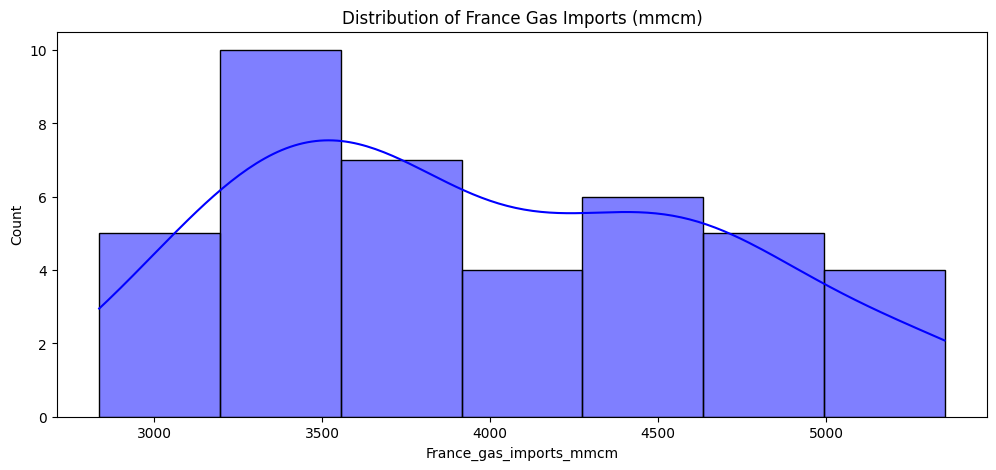

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


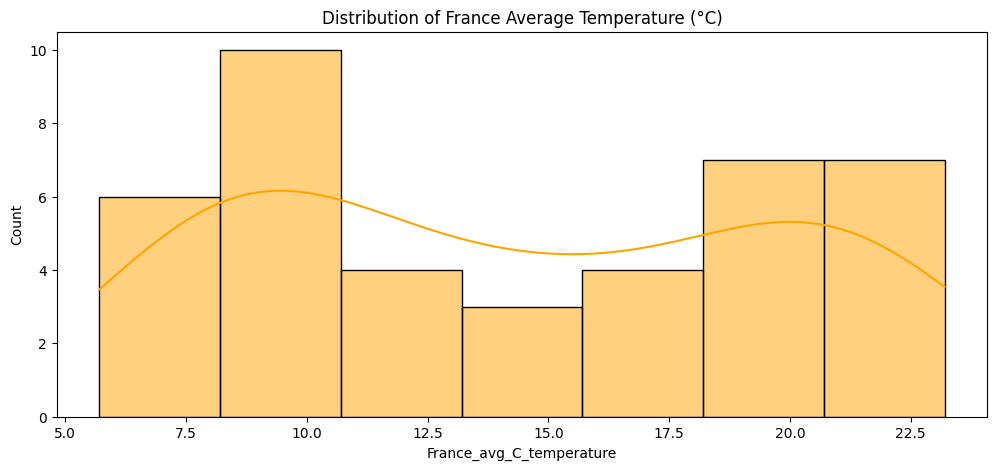

In [39]:
# Distribution plots for imports and temperature (example: Germany)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.histplot(merged_df['France_gas_imports_mmcm'], kde=True, color='blue')
plt.title('Distribution of France Gas Imports (mmcm)')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(merged_df['France_avg_C_temperature'], kde=True, color='orange')
plt.title('Distribution of France Average Temperature (°C)')
plt.show()

All selected columns found.


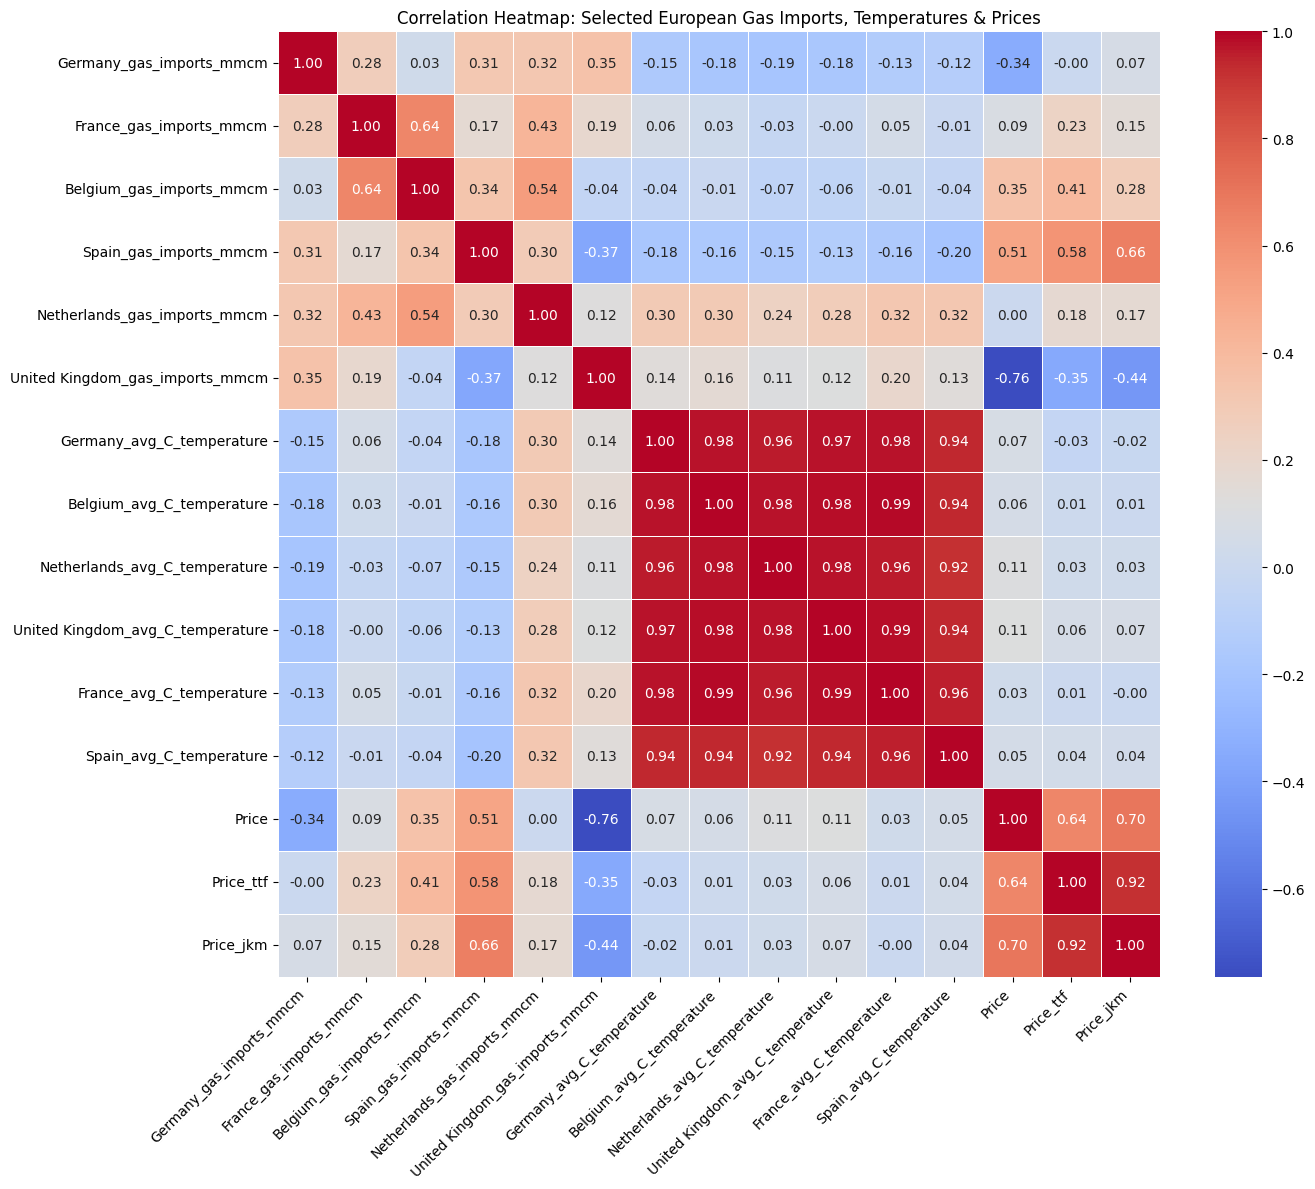

In [40]:
# ✅ Step 1: Define explicit columns
filtered_gas_import_cols = [
    'Germany_gas_imports_mmcm',
    'France_gas_imports_mmcm',
    'Belgium_gas_imports_mmcm',
    'Spain_gas_imports_mmcm',
    'Netherlands_gas_imports_mmcm',
    'United Kingdom_gas_imports_mmcm'
]

temp_cols = [
    'Germany_avg_C_temperature',
    'Belgium_avg_C_temperature',
    'Netherlands_avg_C_temperature',
    'United Kingdom_avg_C_temperature',
    'France_avg_C_temperature',
    'Spain_avg_C_temperature'
]

price_cols = ['Price', 'Price_ttf', 'Price_jkm']

selected_cols = filtered_gas_import_cols + temp_cols + price_cols

# ✅ Step 2: Check for missing columns
missing = [col for col in selected_cols if col not in merged_df.columns]
if missing:
    print("Missing columns:", missing)
else:
    print("All selected columns found.")

# ✅ Step 3: Compute and plot correlation heatmap
corr_matrix = merged_df[selected_cols].corr().fillna(0)

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap: Selected European Gas Imports, Temperatures & Prices")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Rolling averages to identify seasonality

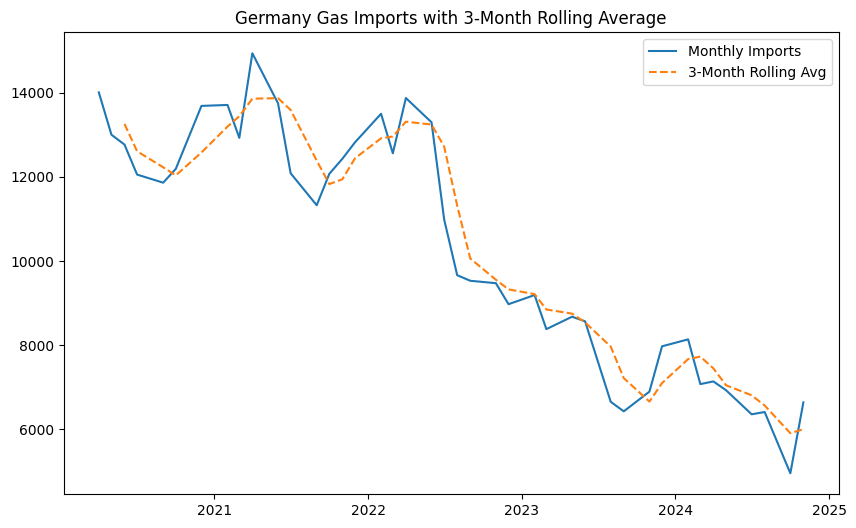

In [41]:
merged_df['Germany_rolling_imports'] = merged_df['Germany_gas_imports_mmcm'].rolling(3).mean()

plt.figure(figsize=(10,6))
plt.plot(merged_df['Date'], merged_df['Germany_gas_imports_mmcm'], label='Monthly Imports')
plt.plot(merged_df['Date'], merged_df['Germany_rolling_imports'], label='3-Month Rolling Avg', linestyle='--')
plt.title('Germany Gas Imports with 3-Month Rolling Average')
plt.legend()
plt.show()

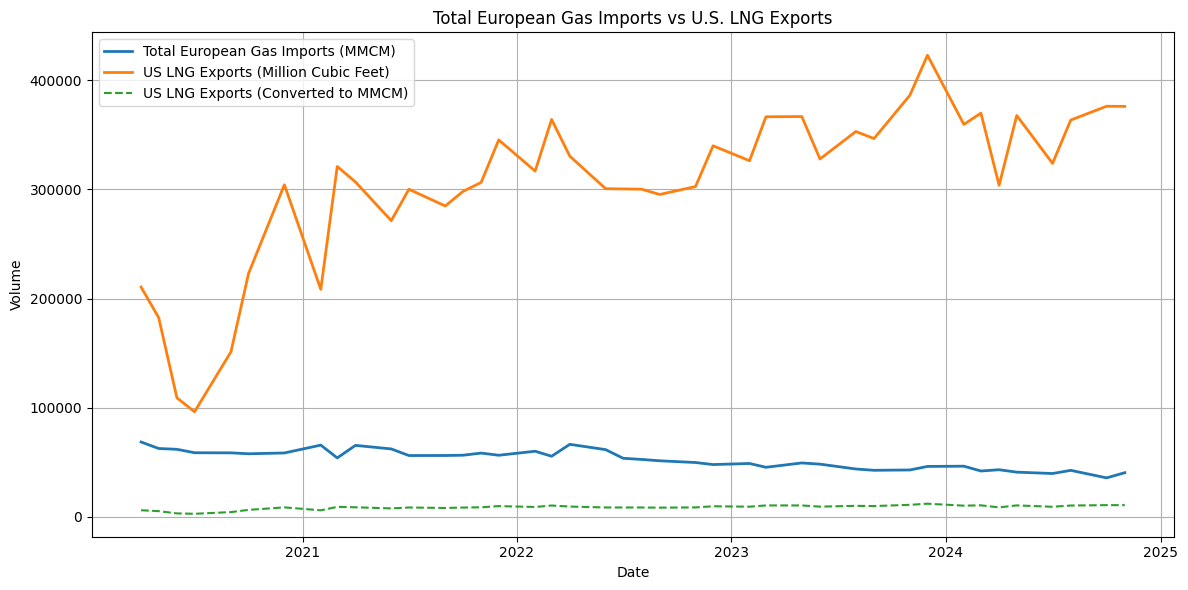

In [42]:
import matplotlib.pyplot as plt

# 1. Select all columns ending with '_gas_imports_mmcm'
import_cols = [col for col in merged_df.columns if col.endswith('_gas_imports_mmcm')]

# 2. Create a new column for total European imports
merged_df['Total_EU_Imports_mmcm'] = merged_df[import_cols].sum(axis=1)

# 3. Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Total_EU_Imports_mmcm'], label='Total European Gas Imports (MMCM)', linewidth=2)
plt.plot(merged_df['Date'], merged_df['Liquefied U.S. Natural Gas Exports  Million Cubic Feet'], label='US LNG Exports (Million Cubic Feet)', linewidth=2)

# 4. Optional: scale US exports for better visual comparison (unit mismatch warning)
# You can convert cubic feet to mmcm (1 MMCF = ~0.0283168 MMCM)
merged_df['US_Exports_mmcm'] = merged_df['Liquefied U.S. Natural Gas Exports  Million Cubic Feet'] * 0.0283168
plt.plot(merged_df['Date'], merged_df['US_Exports_mmcm'], label='US LNG Exports (Converted to MMCM)', linestyle='--')

# 5. Final touches
plt.title('Total European Gas Imports vs U.S. LNG Exports')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
# Example: Correlation of Germany temperature with TTF
merged_df[['Germany_avg_C_temperature', 'Price_ttf']].corr()

,Germany_avg_C_temperature,Price_ttf
Germany_avg_C_temperature,1.000000,-0.033986
Price_ttf,-0.033986,1.000000


In [44]:
'''import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Prepare data
merged_df = merged_df.sort_values('Date')
merged_df.set_index('Date', inplace=True)

# Plot Price_TTF over time with event annotation
plt.figure(figsize=(12, 5))
plt.plot(merged_df['Price_ttf'], label='Price TTF', color='blue')
plt.title('TTF LNG Spot Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (€/MWh)')
plt.grid(True)

# Annotate Russia-Ukraine war
plt.axvline(pd.Timestamp('2022-02-24'), color='red', linestyle='--', label='Russia-Ukraine War')
plt.text(pd.Timestamp('2022-02-24'), merged_df['Price_ttf'].max()*0.9, 'Feb 2022', rotation=90, color='red')

plt.legend()
plt.show()

# Seasonal decomposition (monthly period assumed)
result = seasonal_decompose(merged_df['Price_ttf'], model='additive', period=12)
result.plot()
plt.suptitle('Seasonal Decomposition of TTF Price', fontsize=14)
plt.show()
'''

"import matplotlib.pyplot as plt\nfrom statsmodels.tsa.seasonal import seasonal_decompose\n\n# Prepare data\nmerged_df = merged_df.sort_values('Date')\nmerged_df.set_index('Date', inplace=True)\n\n# Plot Price_TTF over time with event annotation\nplt.figure(figsize=(12, 5))\nplt.plot(merged_df['Price_ttf'], label='Price TTF', color='blue')\nplt.title('TTF LNG Spot Price Over Time')\nplt.xlabel('Date')\nplt.ylabel('Price (€/MWh)')\nplt.grid(True)\n\n# Annotate Russia-Ukraine war\nplt.axvline(pd.Timestamp('2022-02-24'), color='red', linestyle='--', label='Russia-Ukraine War')\nplt.text(pd.Timestamp('2022-02-24'), merged_df['Price_ttf'].max()*0.9, 'Feb 2022', rotation=90, color='red')\n\nplt.legend()\nplt.show()\n\n# Seasonal decomposition (monthly period assumed)\nresult = seasonal_decompose(merged_df['Price_ttf'], model='additive', period=12)\nresult.plot()\nplt.suptitle('Seasonal Decomposition of TTF Price', fontsize=14)\nplt.show()\n"

In [45]:
# Ensure 'Date' column is datetime type (in case it's not yet)
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Sort by date and set as index
merged_df = merged_df.sort_values('Date')
merged_df.set_index('Date', inplace=True)

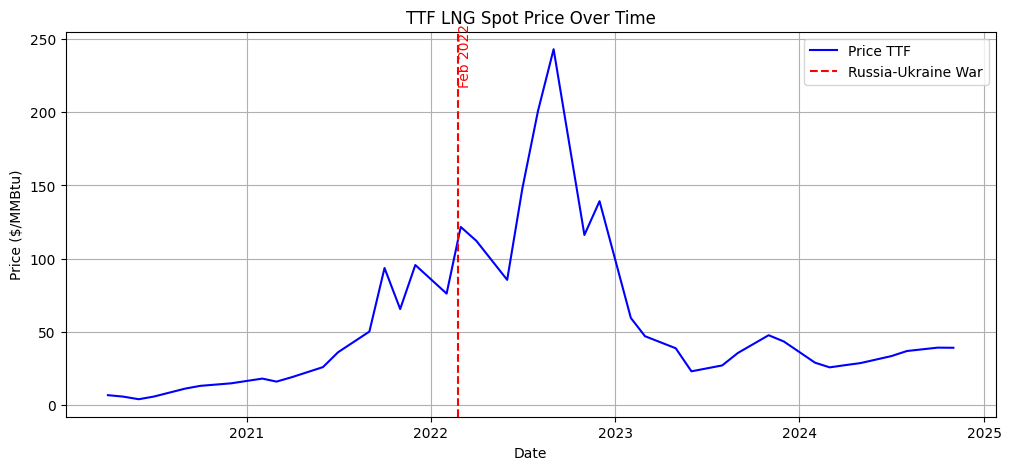

/tmp/ipykernel_35/2637787418.py:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


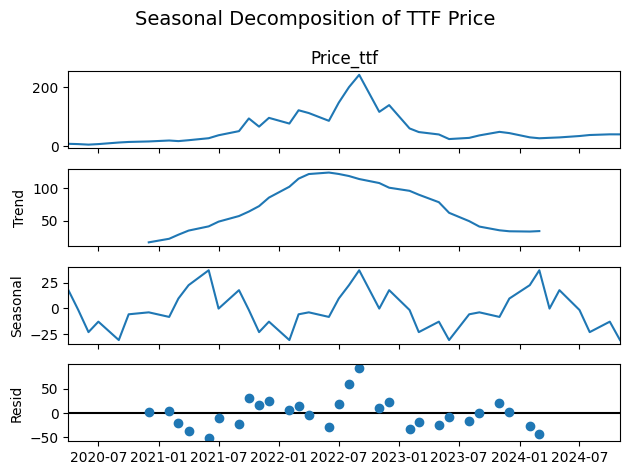

In [46]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot Price_TTF over time with Russia-Ukraine war annotation
plt.figure(figsize=(12, 5))
plt.plot(merged_df['Price_ttf'], label='Price TTF', color='blue')
plt.title('TTF LNG Spot Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($/MMBtu)')
plt.grid(True)
plt.axvline(pd.Timestamp('2022-02-24'), color='red', linestyle='--', label='Russia-Ukraine War')
plt.text(pd.Timestamp('2022-02-24'), merged_df['Price_ttf'].max()*0.9, 'Feb 2022', rotation=90, color='red')
plt.legend()
plt.show()

# Decompose into trend/seasonality/residuals
result = seasonal_decompose(merged_df['Price_ttf'], model='additive', period=12)
result.plot()
plt.suptitle('Seasonal Decomposition of TTF Price', fontsize=14)
plt.tight_layout()
plt.show()


In [47]:
# Set your EUR/USD conversion rate
eur_to_usd = 1.10  # You can fetch actual FX data later if needed

# Convert Price_ttf from €/MWh to $/MMBtu
merged_df['Price_ttf_usd_per_mmbtu'] = (merged_df['Price_ttf'] * eur_to_usd) / 3.412


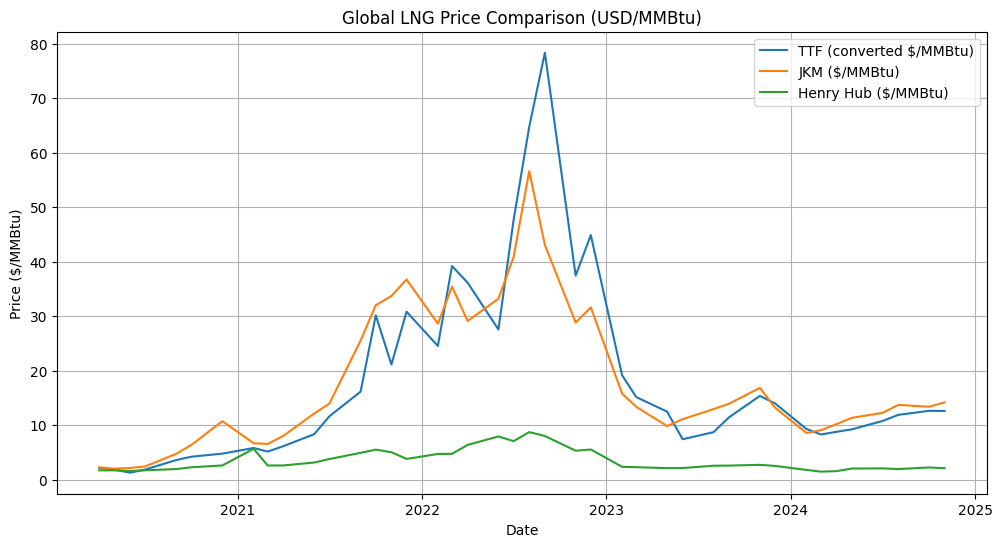

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(merged_df['Price_ttf_usd_per_mmbtu'], label='TTF (converted $/MMBtu)')
plt.plot(merged_df['Price_jkm'], label='JKM ($/MMBtu)')
plt.plot(merged_df['Avg Henry Hub Price'], label='Henry Hub ($/MMBtu)')
plt.title('Global LNG Price Comparison (USD/MMBtu)')
plt.ylabel('Price ($/MMBtu)')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()


Yes, TTF and JKM prices are usually higher than Henry Hub (HH) — and that's expected.

🔍 Why This Happens:
Hub	Region	Typical Price Level	Why Higher/Lower?
Henry Hub (HH)	USA (Louisiana)	✅ Lowest	Huge domestic production (shale gas), limited pipeline export capacity, historically low demand vs supply
TTF	Europe (Netherlands)	🔼 Higher	Reliant on imports (pipelines + LNG), sensitive to geopolitical risks (e.g., Russia), volatile weather, storage constraints
JKM	Asia (Japan-Korea Marker)	🔼🔼 Highest	LNG import-only markets, limited pipeline gas, high demand for power and heating, freight costs

💡 Real-World Insight for Interviews:
Henry Hub is a production-driven hub in a well-supplied domestic market (US).

TTF and JKM are import-driven, demand-sensitive hubs, and pay a premium for security of supply.

LNG trades often involve arbitrage between low-priced US gas and high-priced Europe/Asia — this is a core strategy for LNG traders.

📉 Example Interpretation from Your Plot:
"We can see that TTF and JKM are consistently priced above Henry Hub. This reflects transport costs, regional supply risks, and the premium paid in Europe and Asia for energy security. The arbitrage spread widens particularly during winter or geopolitical disruptions (like the Russia-Ukraine war), creating lucrative opportunities for LNG cargo re-routing."
🔍 Why This Happens:
Hub	Region	Typical Price Level	Why Higher/Lower?
Henry Hub (HH)	USA (Louisiana)	✅ Lowest	Huge domestic production (shale gas), limited pipeline export capacity, historically low demand vs supply

TTF	Europe (Netherlands)	🔼 Higher	Reliant on imports (pipelines + LNG), sensitive to geopolitical risks (e.g., Russia), volatile weather, storage constraints

JKM	Asia (Japan-Korea Marker)	🔼🔼 Highest	LNG import-only markets, limited pipeline gas, high demand for power and heating, freight costs

💡 Real-World Insight for Interviews:
Henry Hub is a production-driven hub in a well-supplied domestic market (US).

TTF and JKM are import-driven, demand-sensitive hubs, and pay a premium for security of supply.

LNG trades often involve arbitrage between low-priced US gas and high-priced Europe/Asia — this is a core strategy for LNG traders.

📉 Example Interpretation from Your Plot:
"We can see that TTF and JKM are consistently priced above Henry Hub. This reflects transport costs, regional supply risks, and the premium paid in Europe and Asia for energy security. The arbitrage spread widens particularly during winter or geopolitical disruptions (like the Russia-Ukraine war), creating lucrative opportunities for LNG cargo re-routing."



✅ Yes: Before 2020, Henry Hub (HH), TTF, and JKM prices were much closer together.
This is a well-documented market phenomenon and here's why:

🔍 Why LNG Hub Prices Converged Before 2020
Period	Key Dynamics
Pre-2020 (especially 2016–2019)	

Global LNG market was oversupplied

Massive ramp-up in LNG exports from the U.S., Australia, and Russia

Mild winters and lower demand

LNG shipping costs were low, and arbitrage was limited

Supply was flexible enough that TTF, JKM, and HH were closely aligned |

🔥 What Changed Post-2020 (esp. after 2021):
Event/Factor	Impact
COVID-19 (2020)	Demand shock initially crushed all prices, then recovery drove spikes
2021–2022 supply crunch	Underinvestment in gas + rapid demand recovery led to tight markets
Russia-Ukraine War (Feb 2022)	Severed Europe's pipeline supply → skyrocketing TTF prices
JKM spiked	Asia bidding against Europe for LNG cargoes
Henry Hub stayed low(er)	US was insulated thanks to strong domestic production

📈 What This Means for Your Graph
So yes — the graph should show:

2016–2019: Prices close together

Late 2021 onward: Prices diverge, especially TTF spiking way above HH

Spreads become profitable → LNG arbitrage booms

🎯 What to Say in an Interview:
"From 2016 to 2019, TTF, JKM, and Henry Hub prices were relatively aligned due to global LNG oversupply, low freight costs, and stable demand. Post-2020, especially during the Russia-Ukraine war, prices decoupled sharply — with TTF and JKM spiking due to import dependence and geopolitical risk. This created significant arbitrage spreads, especially from the U.S. into Europe and Asia."



 First: What is LNG Arbitrage?
LNG arbitrage means buying gas cheap in one region (like the U.S. at Henry Hub) and selling it in a higher-priced region (like Europe at TTF or Asia at JKM) — after accounting for shipping and conversion costs.

So for a trade to be profitable:

Destination Price (JKM/TTF)
−
Shipping Cost
−
US Price (HH)
>
0
Destination Price (JKM/TTF)−Shipping Cost−US Price (HH)>0
📉 Now: What Happens When Prices Are Close?
Let’s break down a hypothetical:

Item	Value
Henry Hub	$2.50/MMBtu
Shipping cost to Europe/Asia	$1.50/MMBtu
TTF or JKM price	$3.80/MMBtu

Now compute the profit:

3.80
−
1.50
−
2.50
=
∗
∗
−
0.20
∗
∗
3.80−1.50−2.50=∗∗−0.20∗∗
➡️ No profit. No arbitrage.

Even though shipping is relatively cheap at $1.50, the spread isn't wide enough.

So no trader will do this trade, unless they have a long-term contract (not a spot cargo).

✅ Why This Matters:
Cheap shipping helps — but only if the price gap (spread) is wide enough.

Before 2020, LNG prices globally were too close together (due to mild winters and oversupply).

So even with low shipping costs, there wasn’t enough margin to make spot arbitrage trades profitable.

Hence:

"Even though shipping costs were low, there wasn’t much arbitrage because the spreads between HH, TTF, and JKM were also low."

🔁 Flip Side — After 2021:
Once TTF/JKM exploded due to Russia-Ukraine and Asian demand, and Henry Hub stayed low, spreads widened to $20–30+/MMBtu at times.

Now the same math:

35
(
𝑇
𝑇
𝐹
)
−
4
(
𝐻
𝐻
)
−
3.5
(
𝑠
ℎ
𝑖
𝑝
𝑝
𝑖
𝑛
𝑔
)
=
💰 Big Arbitrage
35(TTF)−4(HH)−3.5(shipping)=💰 Big Arbitrage
So even if shipping gets expensive, traders still jump in.



In [49]:
merged_df = merged_df.reset_index()

In [50]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])
merged_df = merged_df.sort_values('Date')
merged_df.set_index('Date', inplace=True)

In [51]:
# US LNG exports - lag 1 to 4 weeks
for i in range(1, 5):
    merged_df[f'us_exports_lag_{i}w'] = merged_df['Liquefied U.S. Natural Gas Exports  Million Cubic Feet'].shift(i)

# EU gas imports - aggregate first
eu_cols = [col for col in merged_df.columns if '_gas_imports_mmcm' in col and 'United Kingdom' not in col]
merged_df['eu_total_imports'] = merged_df[eu_cols].sum(axis=1)

# EU imports - lag 1 to 4 weeks
for i in range(1, 5):
    merged_df[f'eu_imports_lag_{i}w'] = merged_df['eu_total_imports'].shift(i)


In [52]:
# Example: imbalance with 2-week delay
merged_df['imbalance_lag_2w'] = merged_df['us_exports_lag_2w'] - merged_df['eu_imports_lag_2w']

In [53]:
# 4-week % change in US LNG exports
merged_df['us_exports_roc_4w'] = merged_df['Liquefied U.S. Natural Gas Exports  Million Cubic Feet'].pct_change(4)

# 3-week rolling mean in EU imports
merged_df['eu_imports_rolling_mean_3w'] = merged_df['eu_total_imports'].rolling(window=3).mean()

# Difference in import-export
merged_df['delta_import_export'] = merged_df['eu_total_imports'] - merged_df['Liquefied U.S. Natural Gas Exports  Million Cubic Feet']


In [54]:
# Convert TTF to $/MMBtu for consistency
eur_to_usd = 1.10
merged_df['ttf_usd_per_mmbtu'] = (merged_df['Price_ttf'] * eur_to_usd) / 3.412

# Price spreads
merged_df['spread_jkm_ttf'] = merged_df['Price_jkm'] - merged_df['ttf_usd_per_mmbtu']
merged_df['spread_hh_ttf'] = merged_df['Avg Henry Hub Price'] - merged_df['ttf_usd_per_mmbtu']
merged_df['spread_jkm_us_exports_lag1'] = merged_df['Price_jkm'] - merged_df['us_exports_lag_1w']


In [55]:
# Interaction of imports with Henry Hub lag
merged_df['hh_lag_2'] = merged_df['Avg Henry Hub Price'].shift(2)
merged_df['eu_imports_lag2_x_hh_lag2'] = merged_df['eu_imports_lag_2w'] * merged_df['hh_lag_2']

# If you have weather anomaly proxy:
# merged_df['us_exports_lag3_x_weather'] = merged_df['us_exports_lag_3w'] * merged_df['weather_anomaly_index']


In [56]:
merged_df.dropna(inplace=True)


In [57]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37 entries, 2020-09-01 to 2024-11-01
Data columns (total 76 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Belgium_gas_imports_mmcm                                37 non-null     int64  
 1   Bulgaria_gas_imports_mmcm                               37 non-null     int64  
 2   Czechia_gas_imports_mmcm                                37 non-null     int64  
 3   Denmark_gas_imports_mmcm                                37 non-null     int64  
 4   Germany_gas_imports_mmcm                                37 non-null     int64  
 5   Estonia_gas_imports_mmcm                                37 non-null     int64  
 6   Ireland_gas_imports_mmcm                                37 non-null     int64  
 7   Greece_gas_imports_mmcm                                 37 non-null     int64  
 8   Spain_gas_imports_mmcm

RMSE: 2.0723173037081013
R²: 0.8358543410474575


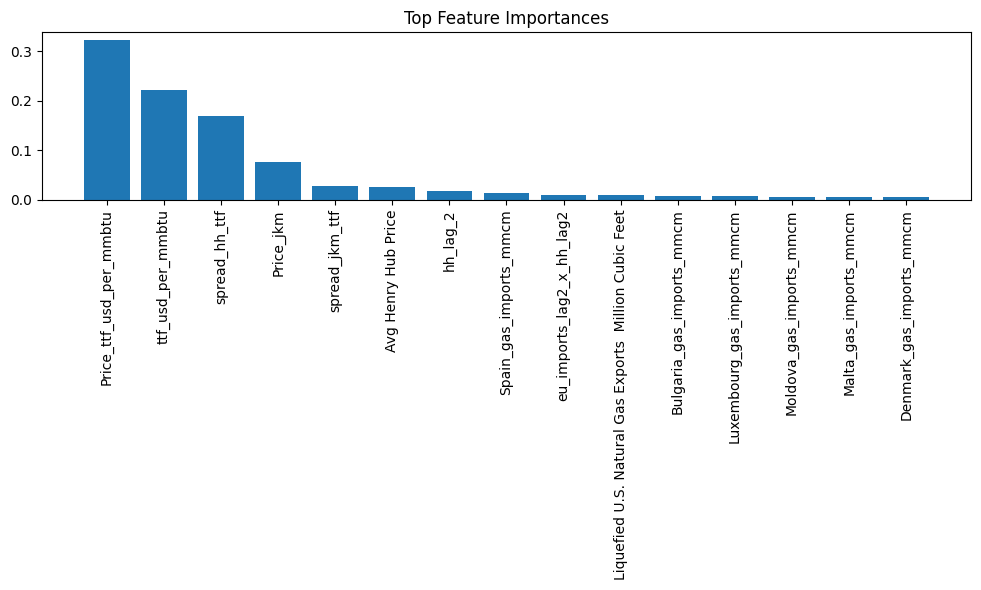

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# -------------------
# 1. Prepare X, y
# -------------------
target = 'Price_ttf'
exclude_cols = ['Price_ttf', 'Price']  # target and redundant
X = merged_df.drop(columns=exclude_cols)
y = merged_df[target]

# -------------------
# 2. Train-test split
# -------------------
# Use last 20% for testing (about 7 samples)
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# -------------------
# 3. Fit model
# -------------------
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# -------------------
# 4. Evaluate
# -------------------
y_pred = rf.predict(X_test)
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))

# -------------------
# 5. Feature Importance
# -------------------
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
top_n = 15

plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances")
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), X.columns[indices[:top_n]], rotation=90)
plt.tight_layout()
plt.show()


In [59]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid division by zero by adding a small epsilon where y_true is 0
    epsilon = 1e-10
    y_true = np.where(y_true == 0, epsilon, y_true)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape:.2f}%")

MAPE: 5.51%
